### Install the beacon_api package to interact with the Beacon Data Lake API

You can find the package on PyPI: https://pypi.org/project/beacon-api/

If you run into any issues, please refer to the GitHub repository: https://github.com/maris-development/beacon

Documentation for the beacon_api package can be found here: https://maris-development.github.io/beacon-py/latest/

Documentation for the Beacon Data Lake technology can be found here: https://maris-development.github.io/beacon/


In [1]:
%pip install beacon-api --upgrade
from beacon_api import * # Import the Beacon API client
import os


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
BEACON_INSTANCE_URL = "https://beacon-wod.maris.nl"

#### Connect to the Beacon WOD Data Lake


In [3]:
client = Client(BEACON_INSTANCE_URL)

Connected to: https://beacon-wod.maris.nl/ server successfully
Beacon Version: 1.5.2


#### List the available columns and their data types (e.g., string, integer) that can be queried.


In [5]:
available_columns = client.available_columns_with_data_type()
list(available_columns)[:50] # Display first 50 available columns

/var/folders/f1/w9sk77s91rv_drj5ydspy0dc0000gn/T/ipykernel_86012/1394025502.py:1: DeprecationWarning: Call to deprecated method available_columns_with_data_type. (Use list_tables() to get available tables. From there you can find the available columns and their data types for each table. This method will be removed in future versions.) -- Deprecated since version 1.1.0.
  available_columns = client.available_columns_with_data_type()


[pyarrow.Field<__entry_key: string>,
 pyarrow.Field<lat: float>,
 pyarrow.Field<lat.standard_name: string>,
 pyarrow.Field<lat.long_name: string>,
 pyarrow.Field<lat.lat_units: string>,
 pyarrow.Field<lon: float>,
 pyarrow.Field<lon.standard_name: string>,
 pyarrow.Field<lon.long_name: string>,
 pyarrow.Field<lon.lon_units: string>,
 pyarrow.Field<time: timestamp[ms]>,
 pyarrow.Field<time.standard_name: string>,
 pyarrow.Field<time.long_name: string>,
 pyarrow.Field<time.units: string>,
 pyarrow.Field<cast: int32>,
 pyarrow.Field<cast.comment: string>,
 pyarrow.Field<country: string>,
 pyarrow.Field<WOD_cruise_identifier: string>,
 pyarrow.Field<WOD_cruise_identifier.comment: string>,
 pyarrow.Field<WOD_cruise_identifier.long_name: string>,
 pyarrow.Field<originators_cruise_identifier: string>,
 pyarrow.Field<wod_unique_cast: int32>,
 pyarrow.Field<wod_unique_cast.cf_role: string>,
 pyarrow.Field<lat.units: string>,
 pyarrow.Field<lat.axis: string>,
 pyarrow.Field<lon.units: string>,
 

#### Build a query


In [ ]:
# Here we build the query step by step. First we select the columns we want to retrieve, then we add the filters and finally we specify the output format.
query_builder = client.query()

query_builder.add_select_column("wod_unique_cast") 
query_builder.add_select_column("Platform", alias="PLATFORM") 
query_builder.add_select_column("Institute", alias="INSTITUTE") 
query_builder.add_select_column("Temperature", alias="TEMPERATURE")
query_builder.add_select_column("Temperature_WODflag", alias="TEMPERATURE_QC")
query_builder.add_select_column("Temperature.units", alias="TEMPERATURE_UNIT")
query_builder.add_select_column("z", alias="DEPTH")
query_builder.add_select_column("time", alias="TIME") 
query_builder.add_select_column("lon", alias="LONGITUDE")
query_builder.add_select_column("lat", alias="LATITUDE")
query_builder.add_select_column(".featureType", alias="FEATURE_TYPE")

## Add the filters
query_builder.add_range_filter("TIME", "1950-01-01T00:00:00", "2025-01-01T00:00:00")  # You can adjust the date range as needed. The format is ISO 8601.
query_builder.add_range_filter("LONGITUDE", -4.5, 9.0)  # Longitude range
query_builder.add_range_filter("LATITUDE", 48.5, 61.0)  # Latitude range from -90 to 90 (you can adjust as needed)
query_builder.add_is_not_null_filter("TEMPERATURE")  # Ensure Temperature is not null
query_builder.add_not_equals_filter("TEMPERATURE", -1e+10)  # Remove missing values
query_builder.add_equals_filter("TEMPERATURE_QC", 0.0)  # Only good quality temperature
query_builder.add_range_filter("DEPTH", 0, 500)  # Depth range from 0 to 10 meters

df = query_builder.to_pandas_dataframe()
df

Creating JSONQuery with from: FromTable(table='default')
Running query: {"output": {"format": "parquet"}, "select": [{"column": "wod_unique_cast", "alias": null}, {"column": "Platform", "alias": "PLATFORM"}, {"column": "Institute", "alias": "INSTITUTE"}, {"column": "Temperature", "alias": "TEMPERATURE"}, {"column": "Temperature_WODflag", "alias": "TEMPERATURE_QC"}, {"column": "z", "alias": "DEPTH"}, {"column": "time", "alias": "TIME"}, {"column": "lon", "alias": "LONGITUDE"}, {"column": "lat", "alias": "LATITUDE"}], "filters": [{"column": "TIME", "gt_eq": "1950-01-01T00:00:00", "lt_eq": "2025-01-01T00:00:00"}, {"column": "LONGITUDE", "gt_eq": -4.5, "lt_eq": 9.0}, {"column": "LATITUDE", "gt_eq": 48.5, "lt_eq": 61.0}, {"is_not_null": {"column": "TEMPERATURE"}}, {"column": "TEMPERATURE", "neq": -10000000000.0}, {"column": "TEMPERATURE_QC", "eq": 0.0}, {"column": "DEPTH", "gt_eq": 0, "lt_eq": 500}], "distinct": null, "sort_by": null, "limit": null, "offset": null, "from": "default"}


/var/folders/f1/w9sk77s91rv_drj5ydspy0dc0000gn/T/ipykernel_76982/2931971120.py:2: DeprecationWarning: Call to deprecated method query. (To query, use list_tables() or list_datasets() as a base to create a new query object. This method will be removed in future versions.)
  query_builder = client.query()


,wod_unique_cast,PLATFORM,INSTITUTE,TEMPERATURE,TEMPERATURE_QC,DEPTH,TIME,LONGITUDE,LATITUDE
0,8775785,NAVY SHIP,MARINEAMT; ABTEILUNG GEOPHYSIK WILHELMSHAVEN (...,12.300000,0,0.0,1979-12-10 12:10:00.002,-2.566667,50.349998
1,8775785,NAVY SHIP,MARINEAMT; ABTEILUNG GEOPHYSIK WILHELMSHAVEN (...,12.100000,0,32.0,1979-12-10 12:10:00.002,-2.566667,50.349998
2,1879312,ANTON DOHRN II (R/V;c.s. DBFR;active 10/17/197...,INSTITUTE OF SEA FISHERIES; former FED.RESEARC...,6.600000,0,0.0,1980-02-16 05:20:00.000,-0.950000,59.799999
3,1879312,ANTON DOHRN II (R/V;c.s. DBFR;active 10/17/197...,INSTITUTE OF SEA FISHERIES; former FED.RESEARC...,6.600000,0,120.0,1980-02-16 05:20:00.000,-0.950000,59.799999
4,8775868,WEGA,DEUTSCHES HYDROGRAPHISCHE INSTITUT (HAMBURG),11.400000,0,0.0,1980-05-19 15:20:00.000,8.233334,54.150002
...,...,...,...,...,...,...,...,...,...
7039473,22765595,THALASSA (Call sign FNFP; built 12/1995; IMO90...,None,17.620001,0,34.0,2024-09-26 17:07:59.999,-2.201000,49.551998
7039474,22765595,THALASSA (Call sign FNFP; built 12/1995; IMO90...,None,17.620001,0,35.0,2024-09-26 17:07:59.999,-2.201000,49.551998
7039475,22765595,THALASSA (Call sign FNFP; built 12/1995; IMO90...,None,17.620001,0,36.0,2024-09-26 17:07:59.999,-2.201000,49.551998
7039476,22765595,THALASSA (Call sign FNFP; built 12/1995; IMO90...,None,17.629999,0,37.0,2024-09-26 17:07:59.999,-2.201000,49.551998


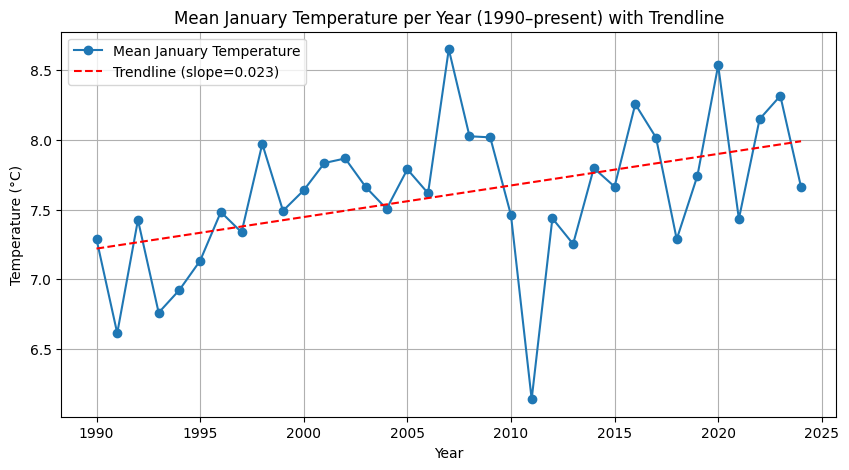

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Filter for January and from 1990 onwards
january_df = df[(df['TIME'].dt.month == 1) & (df['TIME'].dt.year >= 1990)]

# Compute mean temperature per year
january_mean = january_df.groupby(january_df['TIME'].dt.year)['TEMPERATURE'].mean().reset_index()
january_mean.rename(columns={'TIME': 'YEAR'}, inplace=True)

# Extract x (years) and y (temperature)
x = january_mean['YEAR']
y = january_mean['TEMPERATURE']

# Fit linear trendline
coef = np.polyfit(x, y, 1)
trend = np.poly1d(coef)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(x, y, marker='o', label='Mean January Temperature')
plt.plot(x, trend(x), color='red', linestyle='--', label=f'Trendline (slope={coef[0]:.3f})')

plt.title('Mean January Temperature per Year (1990–present) with Trendline')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.legend()
plt.show()
